In [88]:
import numpy as np
import pandas as pd
from datetime import datetime, date
from IPython.display import display, Markdown
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 100)

In [91]:
df = pd.read_csv("/Users/martina.megasari/workspace/wids_datathon/data/widsdatathon2023/train_data.csv")
df_test = pd.read_csv("/Users/martina.megasari/workspace/wids_datathon/data/widsdatathon2023/test_data.csv")
print(f"df shape:{df.shape}")
print(f"df_test shape:{df_test.shape}")

df shape:(375734, 246)
df_test shape:(31354, 245)


In [92]:
df.head()

,index,lat,lon,startdate,contest-pevpr-sfc-gauss-14d__pevpr,nmme0-tmp2m-34w__cancm30,nmme0-tmp2m-34w__cancm40,nmme0-tmp2m-34w__ccsm30,nmme0-tmp2m-34w__ccsm40,nmme0-tmp2m-34w__cfsv20,nmme0-tmp2m-34w__gfdlflora0,nmme0-tmp2m-34w__gfdlflorb0,nmme0-tmp2m-34w__gfdl0,nmme0-tmp2m-34w__nasa0,nmme0-tmp2m-34w__nmme0mean,contest-wind-h10-14d__wind-hgt-10,nmme-tmp2m-56w__cancm3,nmme-tmp2m-56w__cancm4,nmme-tmp2m-56w__ccsm3,nmme-tmp2m-56w__ccsm4,nmme-tmp2m-56w__cfsv2,nmme-tmp2m-56w__gfdl,nmme-tmp2m-56w__gfdlflora,nmme-tmp2m-56w__gfdlflorb,nmme-tmp2m-56w__nasa,nmme-tmp2m-56w__nmmemean,contest-rhum-sig995-14d__rhum,nmme-prate-34w__cancm3,nmme-prate-34w__cancm4,nmme-prate-34w__ccsm3,nmme-prate-34w__ccsm4,nmme-prate-34w__cfsv2,nmme-prate-34w__gfdl,nmme-prate-34w__gfdlflora,nmme-prate-34w__gfdlflorb,nmme-prate-34w__nasa,nmme-prate-34w__nmmemean,contest-wind-h100-14d__wind-hgt-100,nmme0-prate-56w__cancm30,nmme0-prate-56w__cancm40,nmme0-prate-56w__ccsm30,nmme0-prate-56w__ccsm40,nmme0-prate-56w__cfsv20,nmme0-prate-56w__gfdlflora0,nmme0-prate-56w__gfdlflorb0,nmme0-prate-56w__gfdl0,nmme0-prate-56w__nasa0,nmme0-prate-56w__nmme0mean,nmme0-prate-34w__cancm30,nmme0-prate-34w__cancm40,...,wind-uwnd-925-2010-11,wind-uwnd-925-2010-12,wind-uwnd-925-2010-13,wind-uwnd-925-2010-14,wind-uwnd-925-2010-15,wind-uwnd-925-2010-16,wind-uwnd-925-2010-17,wind-uwnd-925-2010-18,wind-uwnd-925-2010-19,wind-uwnd-925-2010-20,wind-hgt-10-2010-1,wind-hgt-10-2010-2,wind-hgt-10-2010-3,wind-hgt-10-2010-4,wind-hgt-10-2010-5,wind-hgt-10-2010-6,wind-hgt-10-2010-7,wind-hgt-10-2010-8,wind-hgt-10-2010-9,wind-hgt-10-2010-10,wind-hgt-100-2010-1,wind-hgt-100-2010-2,wind-hgt-100-2010-3,wind-hgt-100-2010-4,wind-hgt-100-2010-5,wind-hgt-100-2010-6,wind-hgt-100-2010-7,wind-hgt-100-2010-8,wind-hgt-100-2010-9,wind-hgt-100-2010-10,wind-vwnd-925-2010-1,wind-vwnd-925-2010-2,wind-vwnd-925-2010-3,wind-vwnd-925-2010-4,wind-vwnd-925-2010-5,wind-vwnd-925-2010-6,wind-vwnd-925-2010-7,wind-vwnd-925-2010-8,wind-vwnd-925-2010-9,wind-vwnd-925-2010-10,wind-vwnd-925-2010-11,wind-vwnd-925-2010-12,wind-vwnd-925-2010-13,wind-vwnd-925-2010-14,wind-vwnd-925-2010-15,wind-vwnd-925-2010-16,wind-vwnd-925-2010-17,wind-vwnd-925-2010-18,wind-vwnd-925-2010-19,wind-vwnd-925-2010-20
0,0,0.0,0.833333,9/1/14,237.00,29.02,31.64,29.57,30.73,29.71,31.52,31.68,30.56,29.66,30.46,31246.63,28.3,29.47,27.13,27.36,27.71,28.25,27.7,28.72,28.38,28.11,81.72,25.33,17.55,13.59,25.28,38.05,18.06,23.2,38.59,16.5,24.02,16666.81,17.41,5.89,14.37,11.6,17.63,1.17,2.6,0.32,14.88,9.54,35.64,17.54,...,-9.56,66.65,3.00,-69.20,-69.16,27.55,-18.55,-54.43,-12.14,39.02,-72427.68,-16054.10,10487.61,-4560.34,7128.13,-2281.45,-6076.15,-2209.63,3864.18,-3051.21,-25749.70,-5160.59,-1507.91,3391.32,-288.52,-1585.41,1544.02,944.73,-1267.75,-2402.46,-107.46,42.55,29.16,-63.35,23.47,45.56,-33.43,-3.89,4.18,69.09,-27.68,-37.21,8.32,9.56,-2.03,48.13,28.09,-13.50,11.90,4.58
1,1,0.0,0.833333,9/2/14,228.90,29.02,31.64,29.57,30.73,29.71,31.52,31.68,30.56,29.66,30.46,31244.78,28.3,29.47,27.13,27.36,27.71,28.25,27.7,28.72,28.38,28.11,82.56,25.33,17.55,13.59,25.28,38.05,18.06,23.2,38.59,16.5,24.02,16667.31,17.41,5.89,14.37,11.6,17.63,1.17,2.6,0.32,14.88,9.54,35.64,17.54,...,-5.77,61.97,1.23,-71.98,-63.53,38.16,-16.09,-50.22,-8.39,36.31,-70659.22,-16485.03,12437.04,-5318.37,8109.37,-1957.36,-6672.23,-3786.46,2626.55,-3623.29,-25474.37,-5356.70,-1367.76,3188.99,-221.06,-1193.63,1256.48,2018.62,-1110.56,-2413.81,-105.73,45.91,34.83,-56.93,36.28,41.43,-38.06,-1.65,10.08,71.93,-21.13,-36.57,8.77,21.17,4.44,48.60,27.41,-23.77,15.44,3.42
2,2,0.0,0.833333,9/3/14,220.69,29.02,31.64,29.57,30.73,29.71,31.52,31.68,30.56,29.66,30.46,31239.27,28.3,29.47,27.13,27.36,27.71,28.25,27.7,28.72,28.38,28.11,83.29,25.33,17.55,13.59,25.28,38.05,18.06,23.2,38.59,16.5,24.02,16668.39,17.41,5.89,14.37,11.6,17.63,1.17,2.6,0.32,14.88,9.54,35.64,17.54,...,3.96,56.82,-2.95,-71.58,-55.77,46.78,-13.10,-46.99,-3.23,32.81,-68699.81,-16789.52,14299.35,-5947.60,9137.52,-1747.08,-7296.78,-5193.92,1591.47,-4080.94

In [93]:
df["startdate"] = pd.to_datetime(df["startdate"])
df["startdate"].head(5)

0   2014-09-01
1   2014-09-02
2   2014-09-03
3   2014-09-04
4   2014-09-05
Name: startdate, dtype: datetime64[ns]

# Missing values

In [94]:
df_missing = df.isna().sum(axis=0)
df_missing[df_missing > 0]

nmme0-tmp2m-34w__ccsm30    15934
nmme-tmp2m-56w__ccsm3      10280
nmme-prate-34w__ccsm3       8738
nmme0-prate-56w__ccsm30    15934
nmme0-prate-34w__ccsm30    15934
nmme-prate-56w__ccsm3      10280
nmme-tmp2m-34w__ccsm3       8738
ccsm30                     15934
dtype: int64

In [95]:
cols_missing_values = [
    "nmme0-tmp2m-34w__ccsm30",
    "nmme-tmp2m-56w__ccsm3",
    "nmme-prate-34w__ccsm3",
    "nmme0-prate-56w__ccsm30",
    "nmme0-prate-34w__ccsm30",
    "nmme-prate-56w__ccsm3",
    "nmme-tmp2m-34w__ccsm3",
    "ccsm30"]
cols_missing_values_with_date = cols_missing_values.copy()
cols_missing_values_with_date.append("startdate")
df.loc[df[cols_missing_values].isna().any(axis=1), cols_missing_values_with_date]

,nmme0-tmp2m-34w__ccsm30,nmme-tmp2m-56w__ccsm3,nmme-prate-34w__ccsm3,nmme0-prate-56w__ccsm30,nmme0-prate-34w__ccsm30,nmme-prate-56w__ccsm3,nmme-tmp2m-34w__ccsm3,ccsm30,startdate
356,NaN,28.88,0.64,19.37,NaN,8.31,0.64,28.88,2015-08-23
357,NaN,28.67,0.57,19.37,NaN,9.53,0.57,28.88,2015-08-24
358,NaN,28.46,0.50,19.37,NaN,10.74,0.50,28.88,2015-08-25
359,NaN,28.26,0.43,19.37,NaN,11.96,0.43,28.88,2015-08-26
360,NaN,28.05,0.36,19.37,NaN,13.18,0.36,28.88,2015-08-27
...,...,...,...,...,...,...,...,...,...
375399,15.19,NaN,19.06,NaN,12.11,NaN,7.62,NaN,2015-10-02
375400,15.19,NaN,19.06,NaN,12.11,NaN,7.62,NaN,2015-10-03
375401,15.19,NaN,19.06,NaN,12.11,NaN,7.62,NaN,2015-10-04
375402,15.19,NaN,19.06,NaN,12.11,NaN,7.62,NaN,2015-10-05


There seem to be some pattern in the missing values. When nmme-tmp2m-56w__ccsm3 is NaN, nmme0-prate-56w__ccsm30, nmme-prate-56w__ccsm3, ccsm30 are also NaN

In [96]:
df["month"] = df["startdate"].dt.month
df["year"] = df["startdate"].dt.year
for col in cols_missing_values:
    display(
        df.loc[df[col].isna(), [col,"year","month"]].drop_duplicates()
    )

,nmme0-tmp2m-34w__ccsm30,year,month
356,NaN,2015,8
365,NaN,2015,9


,nmme-tmp2m-56w__ccsm3,year,month
370,NaN,2015,9
395,NaN,2015,10


,nmme-prate-34w__ccsm3,year,month
365,NaN,2015,9


,nmme0-prate-56w__ccsm30,year,month
370,NaN,2015,9
395,NaN,2015,10


,nmme0-prate-34w__ccsm30,year,month
356,NaN,2015,8
365,NaN,2015,9


,nmme-prate-56w__ccsm3,year,month
370,NaN,2015,9
395,NaN,2015,10


,nmme-tmp2m-34w__ccsm3,year,month
365,NaN,2015,9


,ccsm30,year,month
370,NaN,2015,9
395,NaN,2015,10


In [97]:
# Regardless of the pattern, 2016 doesn't have any missing values. 
# So it's very likely just some missing measurements. 
# Let's follow the community to use forward fill.
df = df.sort_values(["lat","lon","startdate"]).ffill()

In [98]:
# remove useless index
df = df.drop("index", axis=1)

# EDA

In [66]:
corr_coeff = df.corr(numeric_only=True)

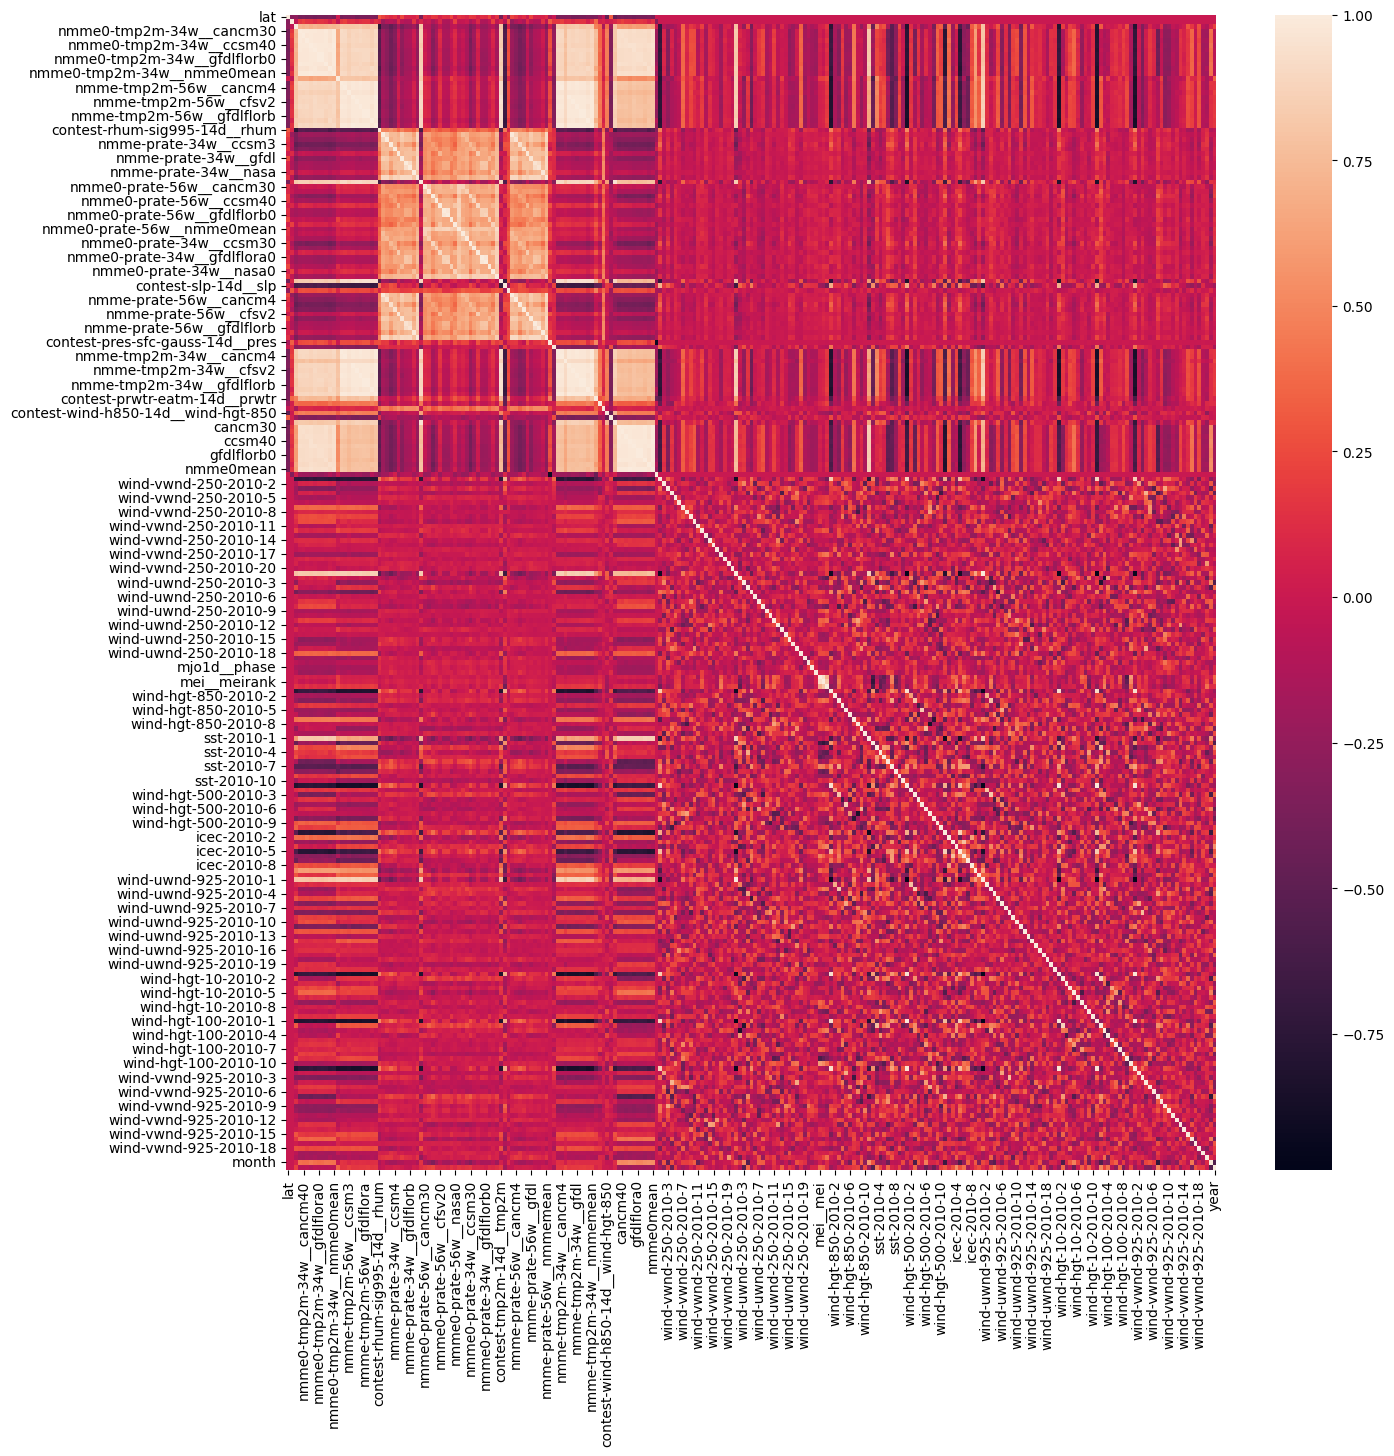

In [76]:
plt.figure(figsize=(15,15))
ax = sns.heatmap(corr_coeff)
plt.show()

In [78]:
corr_coeff.loc[target].sort_values()

wind-hgt-10-2010-1                         -0.815701
wind-vwnd-925-2010-1                       -0.807371
wind-hgt-500-2010-1                        -0.806078
wind-hgt-100-2010-1                        -0.802240
wind-hgt-850-2010-1                        -0.779923
wind-vwnd-250-2010-1                       -0.731919
contest-slp-14d__slp                       -0.707640
icec-2010-5                                -0.603640
contest-rhum-sig995-14d__rhum              -0.565127
sst-2010-7                                 -0.517767
icec-2010-1                                -0.511502
sst-2010-2                                 -0.453613
icec-2010-7                                -0.448767
wind-uwnd-250-2010-5                       -0.415874
lat                                        -0.398388
wind-uwnd-925-2010-11                      -0.396562
wind-hgt-500-2010-8                        -0.387288
contest-wind-uwnd-925-14d__wind-uwnd-925   -0.365888
contest-wind-uwnd-250-14d__wind-uwnd-250   -0.

# Feature engineering

In [99]:
# constant
current_date = date.today()
current_year = current_date.year

In [100]:
def prepare(df):
    # constant
    current_date = date.today()
    current_year = current_date.year
    
    df["startdate"] = pd.to_datetime(df["startdate"], format="%m/%d/%y")
    df["year"] = df["startdate"].dt.year - current_year
    df["month"] = df["startdate"].dt.month
    df["day"] = df["startdate"].dt.day
    df["month_sin"] = np.sin(2*np.pi*df["month"]/12)
    df["month_cos"] = np.cos(2*np.pi*df["month"]/12)
    df["day_sin"] = np.sin(2*np.pi*df["startdate"].dt.dayofyear/365)
    df["day_cos"] = np.cos(2*np.pi*df["startdate"].dt.dayofyear/365)

    df_climate = pd.get_dummies(df["climateregions__climateregion"], drop_first=True, prefix="climate_region")
    df = pd.concat([df, df_climate], axis=1)
    return df

In [101]:
df = prepare(df)

# Model development

In [102]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import lightgbm as lgb

In [103]:
target="contest-tmp2m-14d__tmp2m"

In [104]:
def train_cv(df, features, target, params, num_boost_round=100, n_folds=5):
    random_state = 13
    folds = KFold(n_splits=n_folds, shuffle=True, random_state=random_state)
    scores = []
    for idx, (train_idx, val_idx) in enumerate(folds.split(df[features], df[target])):
    #     print(train_idx)
        X_train = df.loc[train_idx, features]
        y_train = df.loc[train_idx, target]
        train_data = lgb.Dataset(X_train, label=y_train)

        X_val = df.loc[val_idx, features]
        y_val = df.loc[val_idx, target]
        val_data = lgb.Dataset(X_val, label=y_val)

        model = lgb.train(params=params, train_set=train_data, num_boost_round=num_boost_round, valid_sets=[train_data, val_data])
        y_val_pred = model.predict(X_val)

        scores.append(mean_squared_error(y_val_pred, y_val))
    return scores

def create_submission(df_test, fn_prepare, model, features, target, filename):
    df_test = fn_prepare(df_test)
    df_test[target] = model.predict(df_test[features])
    df_test[[target,"index"]].to_csv("submission.csv", index=False)

In [105]:
non_features = ["index","startdate","year","month","day", "contest-tmp2m-14d__tmp2m", "climateregions__climateregion"]
features = [col for col in df.columns if col not in non_features ]
features

['lat',
 'lon',
 'contest-pevpr-sfc-gauss-14d__pevpr',
 'nmme0-tmp2m-34w__cancm30',
 'nmme0-tmp2m-34w__cancm40',
 'nmme0-tmp2m-34w__ccsm30',
 'nmme0-tmp2m-34w__ccsm40',
 'nmme0-tmp2m-34w__cfsv20',
 'nmme0-tmp2m-34w__gfdlflora0',
 'nmme0-tmp2m-34w__gfdlflorb0',
 'nmme0-tmp2m-34w__gfdl0',
 'nmme0-tmp2m-34w__nasa0',
 'nmme0-tmp2m-34w__nmme0mean',
 'contest-wind-h10-14d__wind-hgt-10',
 'nmme-tmp2m-56w__cancm3',
 'nmme-tmp2m-56w__cancm4',
 'nmme-tmp2m-56w__ccsm3',
 'nmme-tmp2m-56w__ccsm4',
 'nmme-tmp2m-56w__cfsv2',
 'nmme-tmp2m-56w__gfdl',
 'nmme-tmp2m-56w__gfdlflora',
 'nmme-tmp2m-56w__gfdlflorb',
 'nmme-tmp2m-56w__nasa',
 'nmme-tmp2m-56w__nmmemean',
 'contest-rhum-sig995-14d__rhum',
 'nmme-prate-34w__cancm3',
 'nmme-prate-34w__cancm4',
 'nmme-prate-34w__ccsm3',
 'nmme-prate-34w__ccsm4',
 'nmme-prate-34w__cfsv2',
 'nmme-prate-34w__gfdl',
 'nmme-prate-34w__gfdlflora',
 'nmme-prate-34w__gfdlflorb',
 'nmme-prate-34w__nasa',
 'nmme-prate-34w__nmmemean',
 'contest-wind-h100-14d__wind-hgt-100',


## Experiment 1 - all features: 1.392
Using all the features with one hot encoded climate regions.
Observation: 
- overfitting
- need to fix the cross validation?

In [106]:
params = {
    "boosting_type": "gbdt",
    "objective": "regression_l2",
    "metric": "mean_squared_error",
    "num_leaves": 100,
    "learning_rate": 0.05,
    "feature_fraction": 0.9,
    "bagging_fraction": 0.8,
    "bagging_freq": 5,
    "verbose": 2
}
scores = train_cv(df, features, target, params, num_boost_round=100, n_folds=5)

[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.003838
[LightGBM] [Debug] init for col-wise cost 0.000386 seconds, init for row-wise cost 0.238305 seconds
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.050938 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Debug] Using Dense Multi-Val Bin
[LightGBM] [Info] Total Bins 60052
[LightGBM] [Info] Number of data points in the train set: 300587, number of used features: 260
[LightGBM] [Info] Start training from score 11.867916
[LightGBM] [Debug] Re-bagging, using 240619 data to train
[LightGBM] [Debug] Trained a tree with leaves = 100 and depth = 10
[1]	training's l2: 88.409	valid_1's l2: 87.9431
[LightGBM] [Debug] Trained a tree with leaves = 100 and depth = 9
[2]	training's l2: 80.1986	valid_1's l2: 79.7808
[LightGBM] [Debug] Trained a tree with leaves = 100 and depth = 8
[3]	trainin

[LightGBM] [Debug] Trained a tree with leaves = 100 and depth = 11
[61]	training's l2: 1.34898	valid_1's l2: 1.38475
[LightGBM] [Debug] Trained a tree with leaves = 100 and depth = 11
[62]	training's l2: 1.30922	valid_1's l2: 1.34496
[LightGBM] [Debug] Trained a tree with leaves = 100 and depth = 13
[63]	training's l2: 1.27114	valid_1's l2: 1.30696
[LightGBM] [Debug] Trained a tree with leaves = 100 and depth = 13
[64]	training's l2: 1.23641	valid_1's l2: 1.27198
[LightGBM] [Debug] Trained a tree with leaves = 100 and depth = 13
[65]	training's l2: 1.2061	valid_1's l2: 1.24196
[LightGBM] [Debug] Re-bagging, using 240691 data to train
[LightGBM] [Debug] Trained a tree with leaves = 100 and depth = 11
[66]	training's l2: 1.17731	valid_1's l2: 1.21309
[LightGBM] [Debug] Trained a tree with leaves = 100 and depth = 13
[67]	training's l2: 1.14976	valid_1's l2: 1.18548
[LightGBM] [Debug] Trained a tree with leaves = 100 and depth = 12
[68]	training's l2: 1.12525	valid_1's l2: 1.16113
[LightG

[LightGBM] [Debug] Trained a tree with leaves = 100 and depth = 10
[21]	training's l2: 13.7555	valid_1's l2: 13.9152
[LightGBM] [Debug] Trained a tree with leaves = 100 and depth = 10
[22]	training's l2: 12.6299	valid_1's l2: 12.7789
[LightGBM] [Debug] Trained a tree with leaves = 100 and depth = 10
[23]	training's l2: 11.6048	valid_1's l2: 11.7424
[LightGBM] [Debug] Trained a tree with leaves = 100 and depth = 9
[24]	training's l2: 10.6731	valid_1's l2: 10.8001
[LightGBM] [Debug] Trained a tree with leaves = 100 and depth = 9
[25]	training's l2: 9.83332	valid_1's l2: 9.95355
[LightGBM] [Debug] Re-bagging, using 240587 data to train
[LightGBM] [Debug] Trained a tree with leaves = 100 and depth = 11
[26]	training's l2: 9.06935	valid_1's l2: 9.18272
[LightGBM] [Debug] Trained a tree with leaves = 100 and depth = 10
[27]	training's l2: 8.37447	valid_1's l2: 8.48042
[LightGBM] [Debug] Trained a tree with leaves = 100 and depth = 10
[28]	training's l2: 7.74214	valid_1's l2: 7.84291
[LightGB

[LightGBM] [Debug] Trained a tree with leaves = 100 and depth = 17
[87]	training's l2: 0.821092	valid_1's l2: 0.859596
[LightGBM] [Debug] Trained a tree with leaves = 100 and depth = 15
[88]	training's l2: 0.811569	valid_1's l2: 0.850249
[LightGBM] [Debug] Trained a tree with leaves = 100 and depth = 12
[89]	training's l2: 0.802423	valid_1's l2: 0.841066
[LightGBM] [Debug] Trained a tree with leaves = 100 and depth = 18
[90]	training's l2: 0.792047	valid_1's l2: 0.830595
[LightGBM] [Debug] Re-bagging, using 240673 data to train
[LightGBM] [Debug] Trained a tree with leaves = 100 and depth = 15
[91]	training's l2: 0.78292	valid_1's l2: 0.821292
[LightGBM] [Debug] Trained a tree with leaves = 100 and depth = 12
[92]	training's l2: 0.774425	valid_1's l2: 0.812846
[LightGBM] [Debug] Trained a tree with leaves = 100 and depth = 14
[93]	training's l2: 0.763492	valid_1's l2: 0.801843
[LightGBM] [Debug] Trained a tree with leaves = 100 and depth = 13
[94]	training's l2: 0.755798	valid_1's l2: 

[LightGBM] [Debug] Trained a tree with leaves = 100 and depth = 12
[48]	training's l2: 2.21366	valid_1's l2: 2.25287
[LightGBM] [Debug] Trained a tree with leaves = 100 and depth = 11
[49]	training's l2: 2.11679	valid_1's l2: 2.15612
[LightGBM] [Debug] Trained a tree with leaves = 100 and depth = 14
[50]	training's l2: 2.02492	valid_1's l2: 2.06457
[LightGBM] [Debug] Re-bagging, using 240671 data to train
[LightGBM] [Debug] Trained a tree with leaves = 100 and depth = 12
[51]	training's l2: 1.94061	valid_1's l2: 1.98052
[LightGBM] [Debug] Trained a tree with leaves = 100 and depth = 10
[52]	training's l2: 1.86352	valid_1's l2: 1.90344
[LightGBM] [Debug] Trained a tree with leaves = 100 and depth = 12
[53]	training's l2: 1.79197	valid_1's l2: 1.83205
[LightGBM] [Debug] Trained a tree with leaves = 100 and depth = 12
[54]	training's l2: 1.72516	valid_1's l2: 1.76499
[LightGBM] [Debug] Trained a tree with leaves = 100 and depth = 14
[55]	training's l2: 1.66294	valid_1's l2: 1.70288
[Light

[LightGBM] [Debug] Trained a tree with leaves = 100 and depth = 9
[8]	training's l2: 45.0728	valid_1's l2: 44.7898
[LightGBM] [Debug] Trained a tree with leaves = 100 and depth = 9
[9]	training's l2: 41.0064	valid_1's l2: 40.748
[LightGBM] [Debug] Trained a tree with leaves = 100 and depth = 10
[10]	training's l2: 37.3186	valid_1's l2: 37.089
[LightGBM] [Debug] Re-bagging, using 240705 data to train
[LightGBM] [Debug] Trained a tree with leaves = 100 and depth = 8
[11]	training's l2: 33.9896	valid_1's l2: 33.7869
[LightGBM] [Debug] Trained a tree with leaves = 100 and depth = 10
[12]	training's l2: 30.9662	valid_1's l2: 30.7933
[LightGBM] [Debug] Trained a tree with leaves = 100 and depth = 9
[13]	training's l2: 28.2266	valid_1's l2: 28.0739
[LightGBM] [Debug] Trained a tree with leaves = 100 and depth = 9
[14]	training's l2: 25.7465	valid_1's l2: 25.6098
[LightGBM] [Debug] Trained a tree with leaves = 100 and depth = 9
[15]	training's l2: 23.4968	valid_1's l2: 23.3779
[LightGBM] [Debu

[LightGBM] [Debug] Trained a tree with leaves = 100 and depth = 14
[73]	training's l2: 1.02914	valid_1's l2: 1.06404
[LightGBM] [Debug] Trained a tree with leaves = 100 and depth = 16
[74]	training's l2: 1.01101	valid_1's l2: 1.04589
[LightGBM] [Debug] Trained a tree with leaves = 100 and depth = 12
[75]	training's l2: 0.992059	valid_1's l2: 1.02678
[LightGBM] [Debug] Re-bagging, using 240387 data to train
[LightGBM] [Debug] Trained a tree with leaves = 100 and depth = 11
[76]	training's l2: 0.976138	valid_1's l2: 1.01109
[LightGBM] [Debug] Trained a tree with leaves = 100 and depth = 17
[77]	training's l2: 0.959936	valid_1's l2: 0.994866
[LightGBM] [Debug] Trained a tree with leaves = 100 and depth = 13
[78]	training's l2: 0.945339	valid_1's l2: 0.980307
[LightGBM] [Debug] Trained a tree with leaves = 100 and depth = 13
[79]	training's l2: 0.930229	valid_1's l2: 0.965223
[LightGBM] [Debug] Trained a tree with leaves = 100 and depth = 16
[80]	training's l2: 0.913086	valid_1's l2: 0.947

[LightGBM] [Debug] Trained a tree with leaves = 100 and depth = 13
[33]	training's l2: 5.35546	valid_1's l2: 5.40473
[LightGBM] [Debug] Trained a tree with leaves = 100 and depth = 10
[34]	training's l2: 4.995	valid_1's l2: 5.04364
[LightGBM] [Debug] Trained a tree with leaves = 100 and depth = 11
[35]	training's l2: 4.66655	valid_1's l2: 4.71482
[LightGBM] [Debug] Re-bagging, using 240420 data to train
[LightGBM] [Debug] Trained a tree with leaves = 100 and depth = 11
[36]	training's l2: 4.36845	valid_1's l2: 4.41485
[LightGBM] [Debug] Trained a tree with leaves = 100 and depth = 10
[37]	training's l2: 4.09022	valid_1's l2: 4.13523
[LightGBM] [Debug] Trained a tree with leaves = 100 and depth = 10
[38]	training's l2: 3.84072	valid_1's l2: 3.88535
[LightGBM] [Debug] Trained a tree with leaves = 100 and depth = 10
[39]	training's l2: 3.61147	valid_1's l2: 3.65536
[LightGBM] [Debug] Trained a tree with leaves = 100 and depth = 13
[40]	training's l2: 3.39648	valid_1's l2: 3.43932
[LightGB

[LightGBM] [Debug] Trained a tree with leaves = 100 and depth = 13
[97]	training's l2: 0.726224	valid_1's l2: 0.760831
[LightGBM] [Debug] Trained a tree with leaves = 100 and depth = 14
[98]	training's l2: 0.718896	valid_1's l2: 0.753503
[LightGBM] [Debug] Trained a tree with leaves = 100 and depth = 16
[99]	training's l2: 0.709873	valid_1's l2: 0.744305
[LightGBM] [Debug] Trained a tree with leaves = 100 and depth = 14
[100]	training's l2: 0.702731	valid_1's l2: 0.737322


In [107]:
X = df[features]
y = df[target]
train_data = lgb.Dataset(X, label=y)
final_model = lgb.train(params=params, train_set=train_data, num_boost_round=200, valid_sets=[train_data])

[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.003835
[LightGBM] [Debug] init for col-wise cost 0.000015 seconds, init for row-wise cost 0.316324 seconds
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.382780 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 60033
[LightGBM] [Info] Number of data points in the train set: 375734, number of used features: 260
[LightGBM] [Info] Start training from score 11.858568
[LightGBM] [Debug] Re-bagging, using 300707 data to train
[LightGBM] [Debug] Trained a tree with leaves = 100 and depth = 10
[1]	training's l2: 88.3142
[LightGBM] [Debug] Trained a tree with leaves = 100 and depth = 9
[2]	training's l2: 80.1165
[LightGBM] [Debug] Trained a tree with leaves = 100 and depth = 9
[3]	training's l2: 72.6985
[LightGBM] [Debug] Trained a tree with leaves = 100 and depth = 9
[4]	training's l2: 65.9991
[LightGBM] [Debug] Trained a tree with leav

[LightGBM] [Debug] Trained a tree with leaves = 100 and depth = 12
[74]	training's l2: 1.0072
[LightGBM] [Debug] Trained a tree with leaves = 100 and depth = 15
[75]	training's l2: 0.989457
[LightGBM] [Debug] Re-bagging, using 300813 data to train
[LightGBM] [Debug] Trained a tree with leaves = 100 and depth = 13
[76]	training's l2: 0.973418
[LightGBM] [Debug] Trained a tree with leaves = 100 and depth = 14
[77]	training's l2: 0.956385
[LightGBM] [Debug] Trained a tree with leaves = 100 and depth = 13
[78]	training's l2: 0.941743
[LightGBM] [Debug] Trained a tree with leaves = 100 and depth = 10
[79]	training's l2: 0.927881
[LightGBM] [Debug] Trained a tree with leaves = 100 and depth = 15
[80]	training's l2: 0.910869
[LightGBM] [Debug] Re-bagging, using 300648 data to train
[LightGBM] [Debug] Trained a tree with leaves = 100 and depth = 13
[81]	training's l2: 0.896763
[LightGBM] [Debug] Trained a tree with leaves = 100 and depth = 15
[82]	training's l2: 0.882789
[LightGBM] [Debug] Tra

[LightGBM] [Debug] Trained a tree with leaves = 100 and depth = 20
[150]	training's l2: 0.45402
[LightGBM] [Debug] Re-bagging, using 300156 data to train
[LightGBM] [Debug] Trained a tree with leaves = 100 and depth = 17
[151]	training's l2: 0.451246
[LightGBM] [Debug] Trained a tree with leaves = 100 and depth = 18
[152]	training's l2: 0.44627
[LightGBM] [Debug] Trained a tree with leaves = 100 and depth = 16
[153]	training's l2: 0.443971
[LightGBM] [Debug] Trained a tree with leaves = 100 and depth = 17
[154]	training's l2: 0.441623
[LightGBM] [Debug] Trained a tree with leaves = 100 and depth = 19
[155]	training's l2: 0.438719
[LightGBM] [Debug] Re-bagging, using 300772 data to train
[LightGBM] [Debug] Trained a tree with leaves = 100 and depth = 13
[156]	training's l2: 0.436207
[LightGBM] [Debug] Trained a tree with leaves = 100 and depth = 15
[157]	training's l2: 0.433748
[LightGBM] [Debug] Trained a tree with leaves = 100 and depth = 16
[158]	training's l2: 0.431376
[LightGBM] [D

In [108]:
create_submission(df_test, prepare, final_model, features, target, "submission1.csv")

In [109]:
df_feature_importance = pd.DataFrame({
    "feature": features,
    "feature_importance": final_model.feature_importance()
})
features_top15 = df_feature_importance.sort_values("feature_importance", ascending=False).head(15)["feature"].values
features_top10 = df_feature_importance.sort_values("feature_importance", ascending=False).head(10)["feature"].values
features_top7 = df_feature_importance.sort_values("feature_importance", ascending=False).head(7)["feature"].values

## Experiment 2 - top 10 features: 1.118
We haven't fixed the cross validation, but let's try to use only the top10 features from the model from experiment 1.<br>
Observation: 
- Much better score
- CV score is much closer to the test score

In [110]:
params = {
    "boosting_type": "gbdt",
    "objective": "regression_l2",
    "metric": "mean_squared_error",
    "num_leaves": 100,
    "learning_rate": 0.05,
    "feature_fraction": 0.9,
    "bagging_fraction": 0.8,
    "bagging_freq": 5,
    "verbose": 1
}
scores_features_top10 = train_cv(df, features_top10, target, params)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002262 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1890
[LightGBM] [Info] Number of data points in the train set: 300587, number of used features: 10
[LightGBM] [Info] Start training from score 11.867916
[1]	training's l2: 88.5525	valid_1's l2: 88.0864
[2]	training's l2: 80.3758	valid_1's l2: 79.961
[3]	training's l2: 72.9871	valid_1's l2: 72.6215
[4]	training's l2: 66.3018	valid_1's l2: 65.9794
[5]	training's l2: 60.2659	valid_1's l2: 59.9773
[6]	training's l2: 54.805	valid_1's l2: 54.5442
[7]	training's l2: 49.8681	valid_1's l2: 49.6451
[8]	training's l2: 45.4072	valid_1's l2: 45.2145
[9]	training's l2: 41.398	valid_1's l2: 41.2297
[10]	training's l2: 37.7964	valid_1's l2: 37.6473
[11]	training's l2: 34.4842	valid_1's l2: 34.3537
[12]	training's l2: 31.4922	valid_1's l2: 31.3781
[

[50]	training's l2: 2.91888	valid_1's l2: 2.97239
[51]	training's l2: 2.83433	valid_1's l2: 2.88685
[52]	training's l2: 2.75812	valid_1's l2: 2.80949
[53]	training's l2: 2.68632	valid_1's l2: 2.73717
[54]	training's l2: 2.61767	valid_1's l2: 2.66755
[55]	training's l2: 2.55381	valid_1's l2: 2.60324
[56]	training's l2: 2.4945	valid_1's l2: 2.54375
[57]	training's l2: 2.4409	valid_1's l2: 2.48975
[58]	training's l2: 2.39134	valid_1's l2: 2.4396
[59]	training's l2: 2.34104	valid_1's l2: 2.38862
[60]	training's l2: 2.29514	valid_1's l2: 2.34206
[61]	training's l2: 2.25239	valid_1's l2: 2.29905
[62]	training's l2: 2.21262	valid_1's l2: 2.2589
[63]	training's l2: 2.17867	valid_1's l2: 2.22453
[64]	training's l2: 2.14319	valid_1's l2: 2.18855
[65]	training's l2: 2.1113	valid_1's l2: 2.15641
[66]	training's l2: 2.08149	valid_1's l2: 2.12652
[67]	training's l2: 2.05405	valid_1's l2: 2.099
[68]	training's l2: 2.02829	valid_1's l2: 2.0732
[69]	training's l2: 2.00156	valid_1's l2: 2.04626
[70]	tra

[10]	training's l2: 37.8232	valid_1's l2: 37.6106
[11]	training's l2: 34.5109	valid_1's l2: 34.321
[12]	training's l2: 31.5163	valid_1's l2: 31.3511
[13]	training's l2: 28.8037	valid_1's l2: 28.6581
[14]	training's l2: 26.3443	valid_1's l2: 26.2175
[15]	training's l2: 24.1198	valid_1's l2: 24.0091
[16]	training's l2: 22.1049	valid_1's l2: 22.0061
[17]	training's l2: 20.2807	valid_1's l2: 20.1951
[18]	training's l2: 18.6289	valid_1's l2: 18.5562
[19]	training's l2: 17.1311	valid_1's l2: 17.0687
[20]	training's l2: 15.7707	valid_1's l2: 15.7152
[21]	training's l2: 14.54	valid_1's l2: 14.4935
[22]	training's l2: 13.4265	valid_1's l2: 13.3884
[23]	training's l2: 12.4115	valid_1's l2: 12.382
[24]	training's l2: 11.4891	valid_1's l2: 11.4653
[25]	training's l2: 10.6515	valid_1's l2: 10.6348
[26]	training's l2: 9.89945	valid_1's l2: 9.89032
[27]	training's l2: 9.21014	valid_1's l2: 9.20605
[28]	training's l2: 8.58385	valid_1's l2: 8.58351
[29]	training's l2: 8.01902	valid_1's l2: 8.02433
[30]

[69]	training's l2: 1.98912	valid_1's l2: 2.04554
[70]	training's l2: 1.96505	valid_1's l2: 2.02181
[71]	training's l2: 1.94013	valid_1's l2: 1.99721
[72]	training's l2: 1.91993	valid_1's l2: 1.97737
[73]	training's l2: 1.90067	valid_1's l2: 1.95799
[74]	training's l2: 1.87691	valid_1's l2: 1.93442
[75]	training's l2: 1.85696	valid_1's l2: 1.91486
[76]	training's l2: 1.83977	valid_1's l2: 1.89832
[77]	training's l2: 1.82421	valid_1's l2: 1.883
[78]	training's l2: 1.80858	valid_1's l2: 1.86731
[79]	training's l2: 1.79301	valid_1's l2: 1.8518
[80]	training's l2: 1.77673	valid_1's l2: 1.83577
[81]	training's l2: 1.76148	valid_1's l2: 1.8208
[82]	training's l2: 1.74433	valid_1's l2: 1.80379
[83]	training's l2: 1.73115	valid_1's l2: 1.79076
[84]	training's l2: 1.71492	valid_1's l2: 1.77482
[85]	training's l2: 1.7014	valid_1's l2: 1.76171
[86]	training's l2: 1.6889	valid_1's l2: 1.74954
[87]	training's l2: 1.67622	valid_1's l2: 1.73752
[88]	training's l2: 1.66269	valid_1's l2: 1.72378
[89]	t

In [111]:
X = df[features_top10]
y = df[target]
train_data = lgb.Dataset(X, label=y)
model_features_top10 = lgb.train(params=params, train_set=train_data, num_boost_round=200, valid_sets=[train_data])

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002497 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1890
[LightGBM] [Info] Number of data points in the train set: 375734, number of used features: 10
[LightGBM] [Info] Start training from score 11.858568
[1]	training's l2: 88.4615
[2]	training's l2: 80.298
[3]	training's l2: 72.9191
[4]	training's l2: 66.2461
[5]	training's l2: 60.2145
[6]	training's l2: 54.7641
[7]	training's l2: 49.8345
[8]	training's l2: 45.3749
[9]	training's l2: 41.3766
[10]	training's l2: 37.7724
[11]	training's l2: 34.4559
[12]	training's l2: 31.4665
[13]	training's l2: 28.7517
[14]	training's l2: 26.2986
[15]	training's l2: 24.0773
[16]	training's l2: 22.0672
[17]	training's l2: 20.2496
[18]	training's l2: 18.6
[19]	training's l2: 17.1095
[20]	training's l2: 15.7535
[21]	training's l2: 14.5227
[22]	training'

In [112]:
create_submission(df_test, prepare, model_features_top10, features_top10, target, "submission_features_top10.csv")

## Experiment 3 - top 7 features: 1.455
Top 10 features gave quite a big improvement, let's try top 7 features

In [114]:
X = df[features_top7]
y = df[target]
train_data = lgb.Dataset(X, label=y)
model_features_top7 = lgb.train(params=params, train_set=train_data, num_boost_round=200, valid_sets=[train_data])

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001525 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1125
[LightGBM] [Info] Number of data points in the train set: 375734, number of used features: 7
[LightGBM] [Info] Start training from score 11.858568
[1]	training's l2: 89.1337
[2]	training's l2: 81.0969
[3]	training's l2: 73.8397
[4]	training's l2: 67.2686
[5]	training's l2: 61.3401
[6]	training's l2: 56.1285
[7]	training's l2: 51.2358
[8]	training's l2: 46.971
[9]	training's l2: 42.9408
[10]	training's l2: 39.2994
[11]	training's l2: 36.1989
[12]	training's l2: 33.3897
[13]	training's l2: 30.8448
[14]	training's l2: 28.3143
[15]	training's l2: 26.226
[16]	training's l2: 24.1404
[17]	training's l2: 22.2503
[18]	training's l2: 20.5405
[19]	training's l2: 18.9865
[20]	training's l2: 17.5681
[21]	training's l2: 16.2828
[22]	training

In [115]:
create_submission(df_test, prepare, model_features_top7, features_top7, target, "submission_features_top7.csv")

# Experiment 4 - top 15 features: 1.1.52


In [116]:
X = df[features_top15]
y = df[target]
train_data = lgb.Dataset(X, label=y)
model_features_top15 = lgb.train(params=params, train_set=train_data, num_boost_round=200, valid_sets=[train_data])

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003574 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3165
[LightGBM] [Info] Number of data points in the train set: 375734, number of used features: 15
[LightGBM] [Info] Start training from score 11.858568
[1]	training's l2: 88.329
[2]	training's l2: 80.1578
[3]	training's l2: 72.7726
[4]	training's l2: 66.0987
[5]	training's l2: 60.0656
[6]	training's l2: 54.6077
[7]	training's l2: 49.6751
[8]	training's l2: 45.208
[9]	training's l2: 41.1725
[10]	training's l2: 37.5189
[11]	training's l2: 34.2126
[12]	training's l2: 31.2163
[13]	training's l2: 28.5036
[14]	training's l2: 26.0504
[15]	training's l2: 23.8291
[16]	training's l2: 21.8216
[17]	training's l2: 19.995
[18]	training's l2: 18.3434
[19]	training's l2: 16.8394
[20]	training's l2: 15.4798
[21]	training's l2: 14.2484
[22]	training

In [117]:
create_submission(df_test, prepare, model_features_top15, features_top15, target, "submission_features_top15.csv")

# Experiment 5 - PCA(n_components=5): not submitted

In [131]:
from sklearn.decomposition import PCA
pca_weather = PCA(n_components=50)
pc_weather = pca_weather.fit_transform(df[features])

In [132]:
df_test_prepared = prepare(df_test)
df_test_pc_weather = pca_weather.transform(df_test_prepared[features])

In [134]:
y = df[target]
train_data = lgb.Dataset(pc_weather, label=y)
model_pca5 = lgb.train(params=params, train_set=train_data, num_boost_round=200, valid_sets=[train_data])
df_test[target] = model_pca5.predict(df_test_pc_weather)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009131 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12750
[LightGBM] [Info] Number of data points in the train set: 375734, number of used features: 50
[LightGBM] [Info] Start training from score 11.858568
[1]	training's l2: 89.0962
[2]	training's l2: 81.5191
[3]	training's l2: 74.6658
[4]	training's l2: 68.4492
[5]	training's l2: 62.8175
[6]	training's l2: 57.6895
[7]	training's l2: 53.1564
[8]	training's l2: 48.9188
[9]	training's l2: 45.0373
[10]	training's l2: 41.5368
[11]	training's l2: 38.4005
[12]	training's l2: 35.4668
[13]	training's l2: 32.7966
[14]	training's l2: 30.4317
[15]	training's l2: 28.21
[16]	training's l2: 26.2046
[17]	training's l2: 24.3701
[18]	training's l2: 22.6731
[19]	training's l2: 21.136
[20]	training's l2: 19.7829
[21]	training's l2: 18.4693
[22]	trainin